<a id='top-page'></a>
# <img src="../images/PCAfold-logo.svg" style="height:100px"> Plotting PCA results

In this tutorial, we present plotting functionalities from the ``reduction`` module that aid in visualizing PCA results.

### PCA plotting functionalities

- [**Plotting PCA results**](#plotting_pca)
    - [**Eigenvectors**](#eigenvectors)
    - [**Eigenvectors comparison**](#eigenvectors-comparison)
    - [**Eigenvalue distribution**](#eigenvalues)
    - [**Eigenvalue distribution comparison**](#eigenvalues-comparison)
    - [**Cumulative variance**](#cumulative-variance)
    - [**Two-dimensional manifold**](#2d-manifold)
    - [**Three-dimensional manifold**](#3d-manifold)
    - [**Parity plots**](#parity-plots)
- [**References**](#references)

***

**Should plots be saved?**

In [27]:
save_plots = False

***

We import the necessary modules:

In [2]:
from PCAfold import PCA
from PCAfold import reduction
import numpy as np

and we set some initial parameters:

In [3]:
title = None
save_filename = None

***
<a id='plotting_pca'></a>
## Plotting PCA results

[**↑ Go to the top**](#top-page)

As an example, we will use a data set representing combustion of syngas (CO/H2 mixture) in air generated from the steady laminar flamelet model. This data set has 11 variables and 50,000 observations. The data set was generated using [*Spitfire*](https://github.com/sandialabs/Spitfire) software [[1]](#references) and a chemical mechanism by Hawkes et al. [[2]](#references). To load the data set from the tutorials directory:

In [4]:
X = np.genfromtxt('data-state-space.csv', delimiter=',')
X_names = ['$T$', '$H_2$', '$O_2$', '$O$', '$OH$', '$H_2O$', '$H$', '$HO_2$', '$CO$', '$CO_2$', '$HCO$']

We generate four PCA objects corresponding to four scaling criteria:

In [5]:
pca_X_Auto = PCA(X, scaling='auto', n_components=3)
pca_X_Range = PCA(X, scaling='range', n_components=3)
pca_X_Vast = PCA(X, scaling='vast', n_components=3)
pca_X_Pareto = PCA(X, scaling='pareto', n_components=3)

and we will plot PCA results from the generated objects.

<a id='eigenvectors'></a>
### Eigenvectors

[**↑ Go to the top**](#top-page)

Weights of a single eigenvector can be plotted using the ``reduction.plot_eigenvectors`` function. Note, that multiple eigenvectors can be passed as an input and this function will
generate as many plots as there are eigenvectors supplied.

Below is an example of plotting just the first eigenvector:

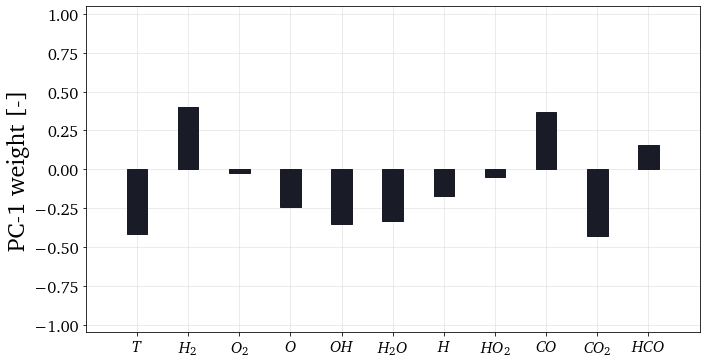

In [6]:
plt = reduction.plot_eigenvectors(pca_X_Auto.A[:,0], variable_names=X_names)

To plot all eigenvectors resulting from a single ``PCA`` class object:

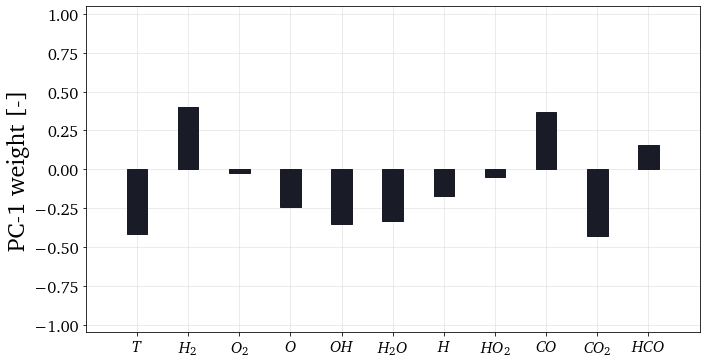

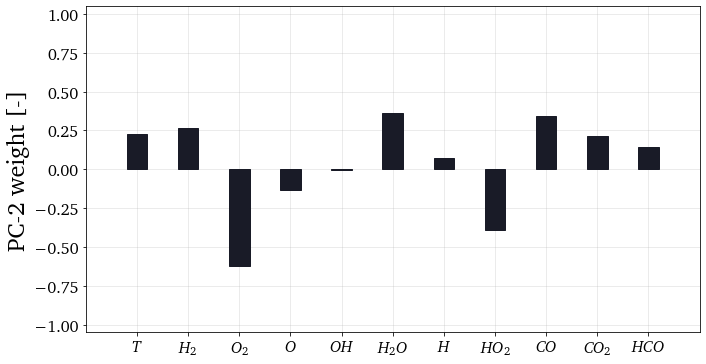

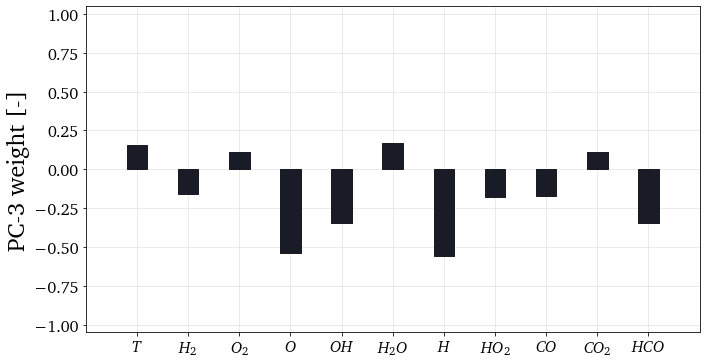

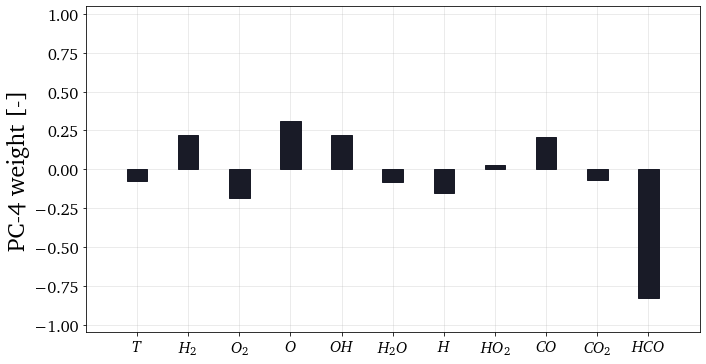

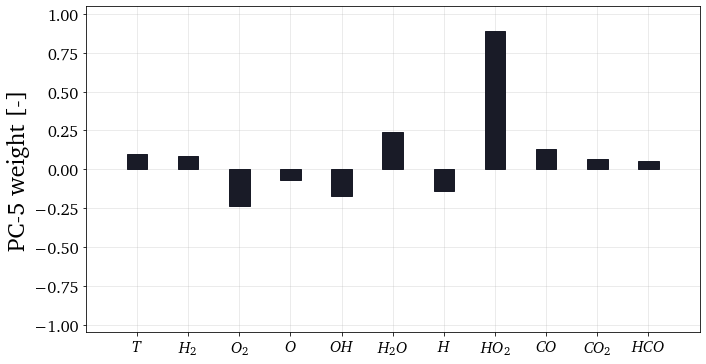

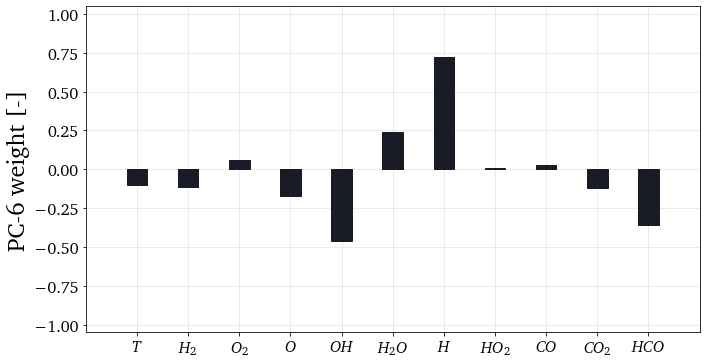

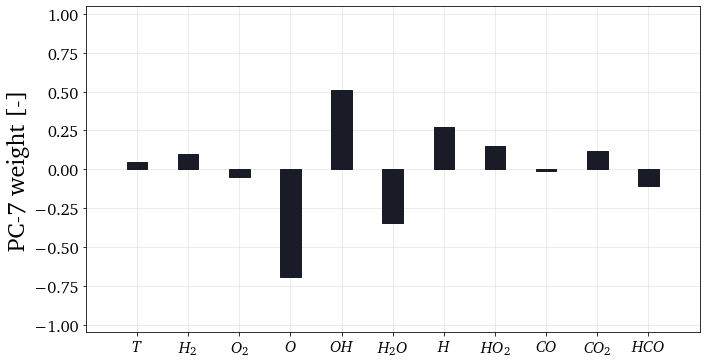

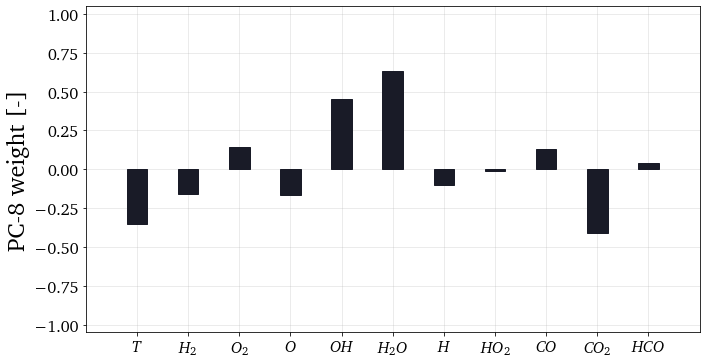

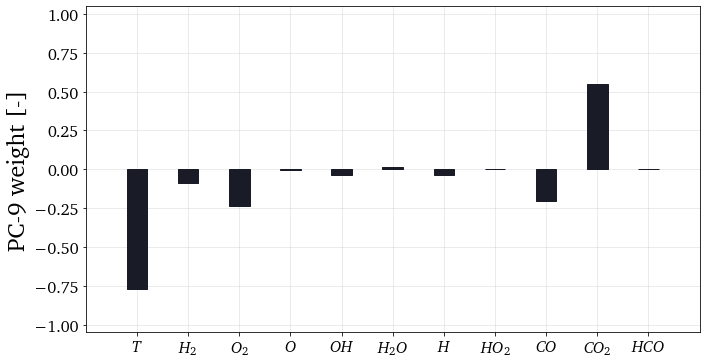

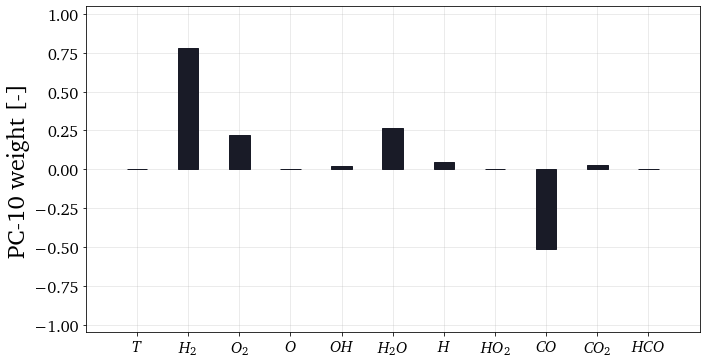

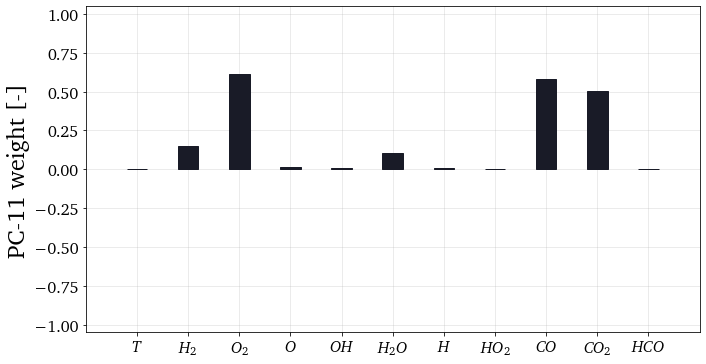

In [7]:
plts = reduction.plot_eigenvectors(pca_X_Auto.A, variable_names=X_names)

Two weight normalizations are available:

- No normalization. To use this variant set ``plot_absolute=False``. Example can be seen below:

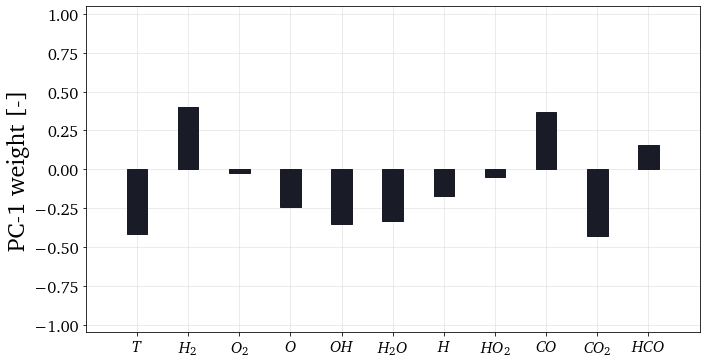

In [8]:
if save_plots == True: save_filename = 'plotting-pca.svg'
plt = reduction.plot_eigenvectors(pca_X_Auto.A[:,0], eigenvectors_indices=[], variable_names=X_names, plot_absolute=False, save_path='../images/', save_filename=save_filename)

- Absolute values. To use this variant set ``plot_absolute=True``. Example can be seen below:


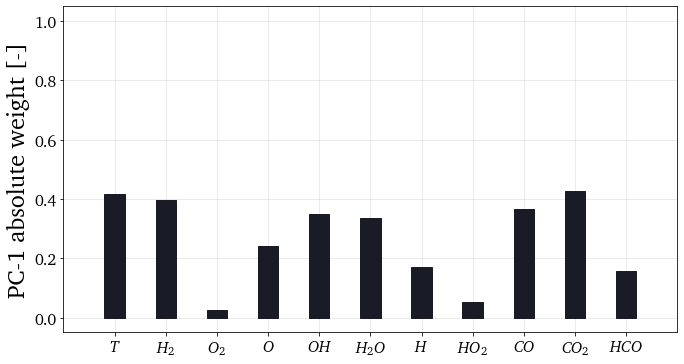

In [9]:
if save_plots == True: save_filename = 'plotting-pca-absolute.svg'
plt = reduction.plot_eigenvectors(pca_X_Auto.A[:,0], eigenvectors_indices=[], variable_names=X_names, plot_absolute=True, save_path='../images/', save_filename=save_filename)

<a id='eigenvectors-comparison'></a>
### Eigenvectors comparison

[**↑ Go to the top**](#top-page)

Eigenvectors resulting from, for instance, different ``PCA`` class objects can
be compared on a single plot using the ``reduction.plot_eigenvectors_comparison`` function.

Two weight normalizations are available:

- No normalization. To use this variant set ``plot_absolute=False``. Example can be seen below:


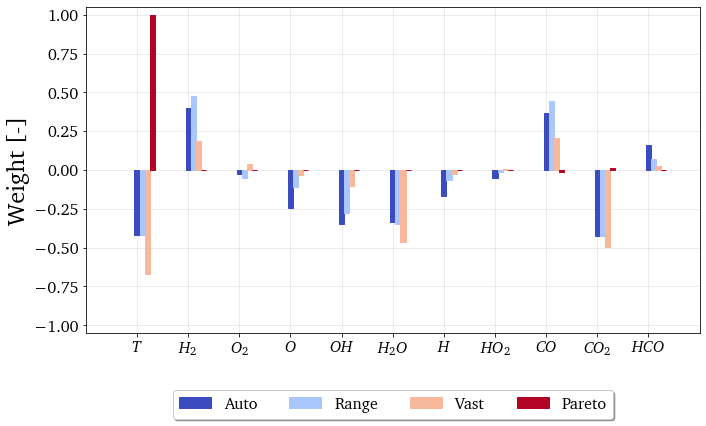

In [10]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvectors-comparison.svg'
plt = reduction.plot_eigenvectors_comparison((pca_X_Auto.A[:,0], pca_X_Range.A[:,0], pca_X_Vast.A[:,0], pca_X_Pareto.A[:,0]), legend_labels=['Auto', 'Range', 'Vast', 'Pareto'], variable_names=X_names, plot_absolute=False, color_map='coolwarm', save_filename=save_filename)

- Absolute values. To use this variant set ``plot_absolute=True``. Example can be seen below:

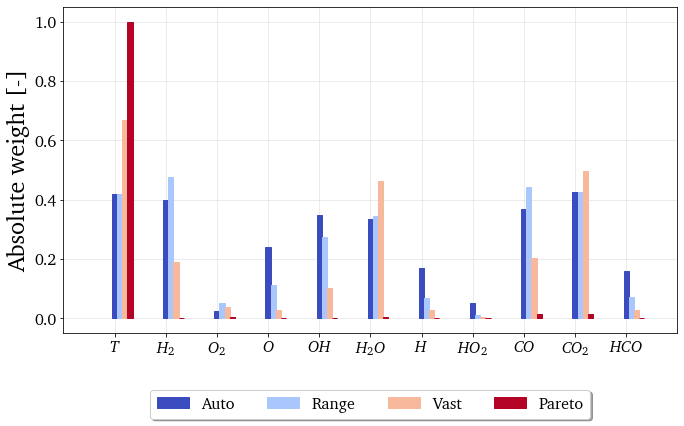

In [11]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvectors-comparison-absolute.svg'
plt = reduction.plot_eigenvectors_comparison((pca_X_Auto.A[:,0], pca_X_Range.A[:,0], pca_X_Vast.A[:,0], pca_X_Pareto.A[:,0]), legend_labels=['Auto', 'Range', 'Vast', 'Pareto'], variable_names=X_names, plot_absolute=True, color_map='coolwarm', save_filename=save_filename)

<a id='eigenvalues'></a>
### Eigenvalue distribution

[**↑ Go to the top**](#top-page)

Eigenvalue distribution can be plotted using the ``reduction.plot_eigenvalue_distribution`` function.

Two eigenvalue normalizations are available:

- No normalization. To use this variant set ``normalized=False``. Example can be seen below:

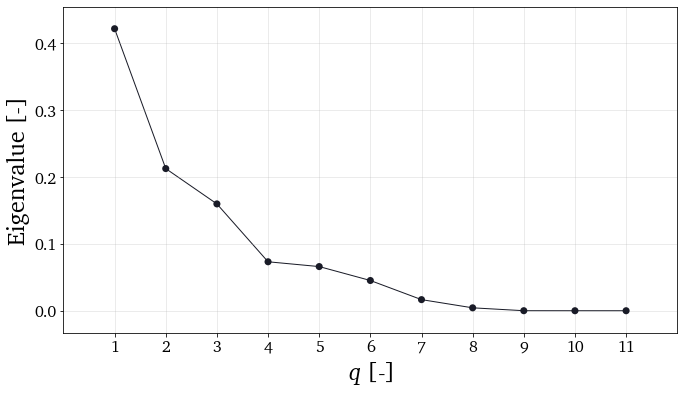

In [12]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvalue-distribution.svg'
plt = reduction.plot_eigenvalue_distribution(pca_X_Auto.L, normalized=False, save_filename=save_filename)

- Normalized to 1. To use this variant set ``normalized=True``. Example can be seen below:

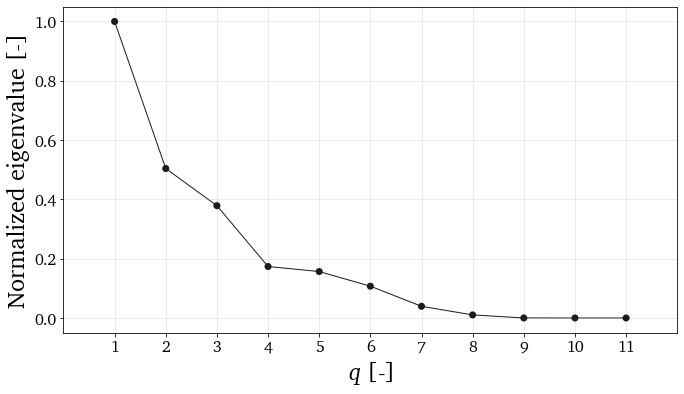

In [13]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvalue-distribution-normalized.svg'
plt = reduction.plot_eigenvalue_distribution(pca_X_Auto.L, normalized=True, save_filename=save_filename)

<a id='eigenvalues-comparison'></a>
### Eigenvalue distribution comparison

[**↑ Go to the top**](#top-page)

Eigenvalues resulting from, for instance, different ``PCA`` class objects can
be compared on a single plot using the ``reduction.plot_eigenvalues_comparison`` function.

Two eigenvalue normalizations are available:

- No normalization. To use this variant set ``normalized=False``. Example can be seen below:


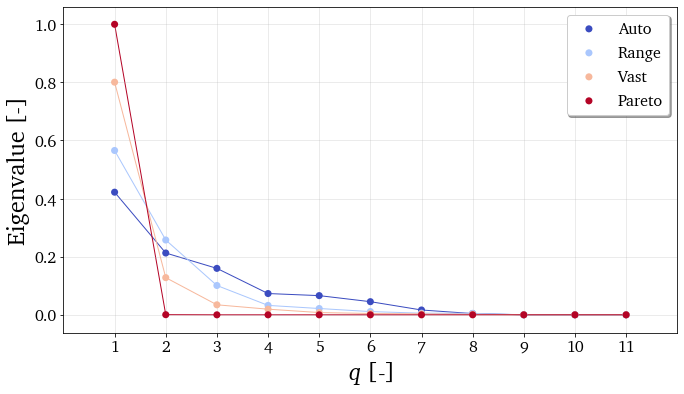

In [14]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvalue-distribution-comparison.svg'
plt = reduction.plot_eigenvalue_distribution_comparison((pca_X_Auto.L, pca_X_Range.L, pca_X_Vast.L, pca_X_Pareto.L), legend_labels=['Auto', 'Range', 'Vast', 'Pareto'], normalized=False, color_map='coolwarm', save_filename=save_filename)

- Normalized to 1. To use this variant set ``normalized=True``. Example can be seen below:


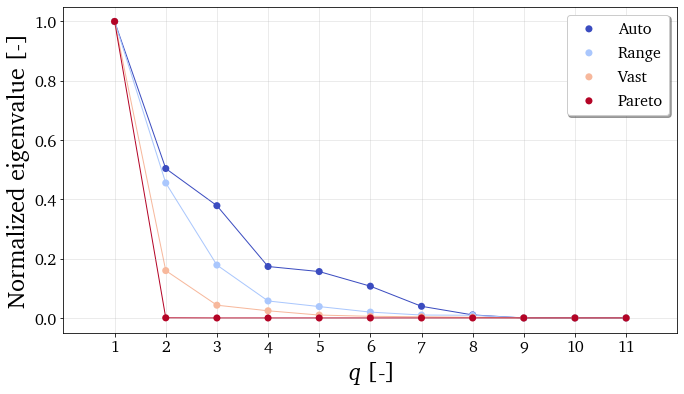

In [15]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvalue-distribution-comparison-normalized.svg'
plt = reduction.plot_eigenvalue_distribution_comparison((pca_X_Auto.L, pca_X_Range.L, pca_X_Vast.L, pca_X_Pareto.L), legend_labels=['Auto', 'Range', 'Vast', 'Pareto'], normalized=True, color_map='coolwarm', save_filename=save_filename)

<a id='cumulative-variance'></a>
### Cumulative variance

[**↑ Go to the top**](#top-page)

Cumulative variance computed from eigenvalues can be plotted using the
``reduction.plot_cumulative_variance`` function. Example of a plot:

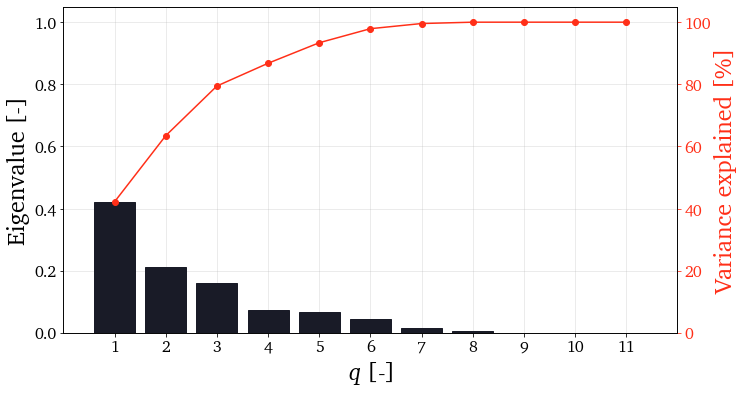

In [16]:
if save_plots: save_filename = '../images/cumulative-variance.svg'
plt = reduction.plot_cumulative_variance(pca_X_Auto.L, n_components=0, save_filename=save_filename)

The number of eigenvalues to look at can also be truncated by setting
``n_components`` input parameter accordingly. Example of a plot when
``n_components=5`` in this case:

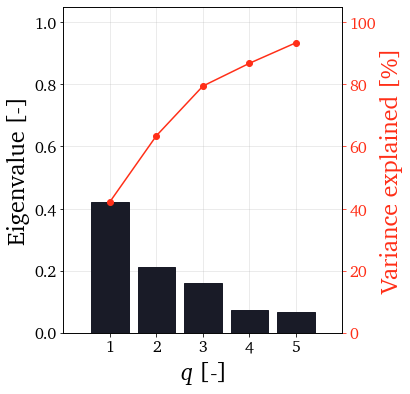

In [17]:
if save_plots: save_filename = '../images/cumulative-variance-truncated.svg'
plt = reduction.plot_cumulative_variance(pca_X_Auto.L, n_components=5, save_filename=save_filename)

<a id='2d-manifold'></a>
### Two-dimensional manifold

[**↑ Go to the top**](#top-page)

Two-dimensional manifold resulting from performing PCA transformation can be
plotted using the ``reduction.plot_2d_manifold`` function. We first calculate
the principal components by transforming the original data set to the new basis:

In [18]:
principal_components = pca_X_Vast.transform(X)

By setting ``color=X[:,0]`` parameter, the manifold can be additionally
colored by the first variable in the data set (in this case, the temperature). Note that you can select the colormap to use through the ``color_map`` parameter. Example of using ``color_map='inferno'`` and coloring by the first variable in the data set:

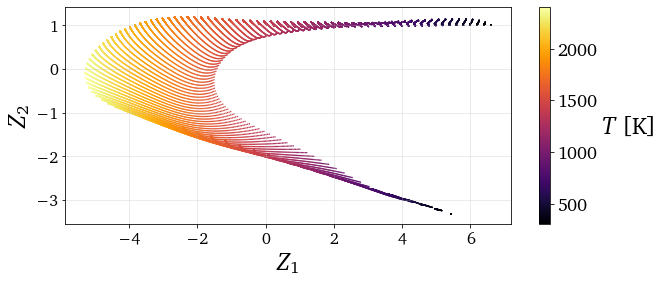

In [19]:
if save_plots: save_filename = '../images/plotting-pca-2d-manifold-inferno.svg'
plt = reduction.plot_2d_manifold(principal_components[:,0], principal_components[:,1], color=X[:,0], x_label='$Z_1$', y_label='$Z_2$', colorbar_label='$T$ [K]', color_map='inferno', figure_size=(10,4), save_filename=save_filename)

Example of an uncolored plot:

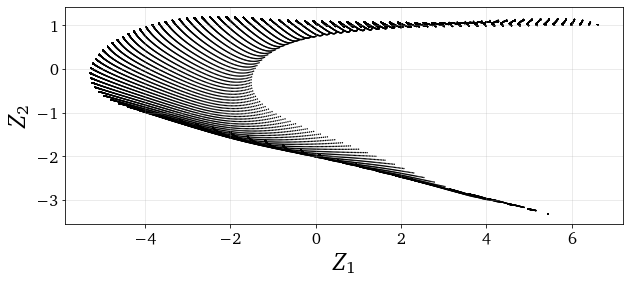

In [20]:
if save_plots: save_filename = '../images/plotting-pca-2d-manifold-black.svg'
plt = reduction.plot_2d_manifold(principal_components[:,0], principal_components[:,1], x_label='$Z_1$', y_label='$Z_2$', figure_size=(10,4), save_filename=save_filename)

Example of using ``color_map='Blues'`` and coloring by the first variable in the data set:


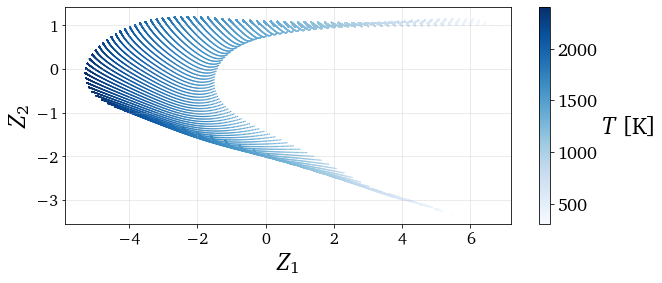

In [21]:
if save_plots: save_filename = '../images/plotting-pca-2d-manifold-blues.svg'
plt = reduction.plot_2d_manifold(principal_components[:,0], principal_components[:,1], color=X[:,0], x_label='$Z_1$', y_label='$Z_2$', colorbar_label='$T$ [K]', color_map='Blues', figure_size=(10,4), save_filename=save_filename)

<a id='3d-manifold'></a>
### Three-dimensional manifold

[**↑ Go to the top**](#top-page)

Similarly, a three-dimensional manifold can be visualized:

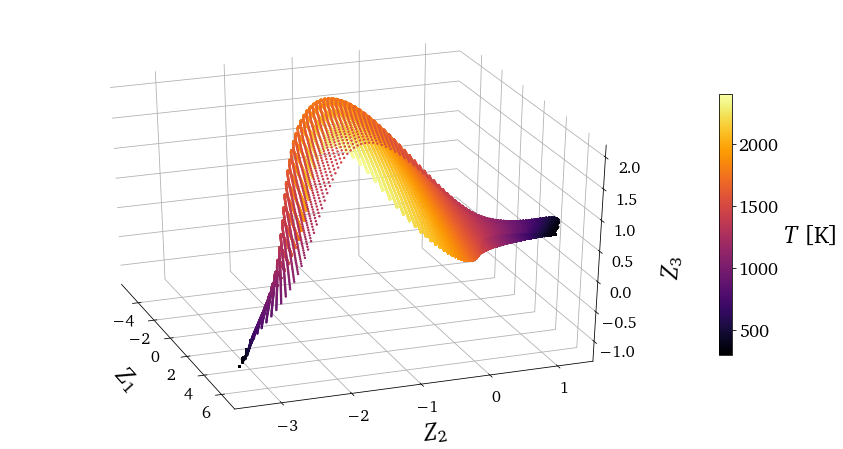

In [22]:
if save_plots: save_filename = '../images/plotting-pca-3d-manifold.svg'
plt = reduction.plot_3d_manifold(principal_components[:,0], principal_components[:,1], principal_components[:,2], elev=30, azim=-20, color=X[:,0], x_label='$Z_1$', y_label='$Z_2$', z_label='$Z_3$', colorbar_label='$T$ [K]', color_map='inferno', figure_size=(15,8), save_filename=save_filename)

<a id='parity-plots'></a>
### Parity plots

[**↑ Go to the top**](#top-page)

Parity plots of reconstructed variables can be visualized using the `reduction.plot_parity` function. We approximate the data set using the previously obtained two principal components:

In [23]:
X_rec = pca_X_Vast.reconstruct(principal_components)

and we generate a parity plot which visualizes the reconstruction of the first variable:

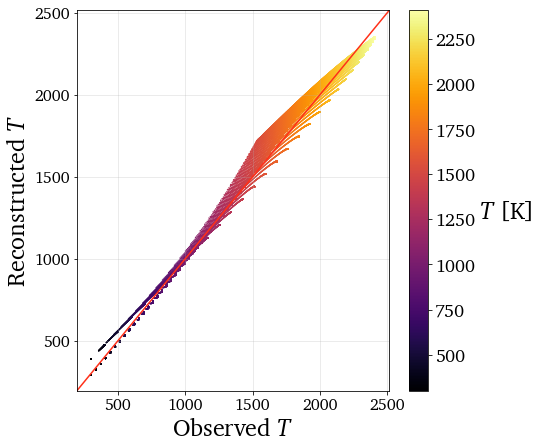

In [26]:
if save_plots: save_filename = '../images/plotting-pca-parity.svg'
plt = reduction.plot_parity(X[:,0], X_rec[:,0], color=X[:,0], x_label='Observed $T$', y_label='Reconstructed $T$', colorbar_label='$T$ [K]', color_map='inferno', figure_size=(7,7), save_filename=save_filename)

Similarly as in the ``reduction.plot_2d_manifold`` function, you can select the colormap to use.

<a id='references'></a>
***

## References

[**↑ Go to the top**](#top-page)

> [[1]](#plotting_pca) [M. A. Hansen, *Spitfire*, 2020](https://github.com/sandialabs/Spitfire)
> 
> [[2]](#plotting_pca) E. R. Hawkes, R. Sankaran, J. C. Sutherland, J. H. Chen, *Scalar mixing in direct numerical simulations of temporally evolving plane jet flames with skeletal co/h2 kinetics*, Proceedings of the combustion institute 31 (1) (2007) 1633–1640

***